# Facial Keypoints Detection

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data Loading

In [2]:
from fastai.vision import *

In [3]:
path = Config.data_path()/'facial-keypoints-detection'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection')

In [4]:
#! pip install kaggle --upgrade

In [5]:
#! rm {path}/*

#! kaggle competitions download -c facial-keypoints-detection -p {path}

#! unzip -q -n {path}/facial-keypoints-detection.zip -d {path}
#! unzip -q -n {path}/training.zip -d {path}
#! unzip -q -n {path}/test.zip -d {path}
#! rm {path}/*.zip

path.ls()

[PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/SampleSubmission.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/IdLookupTable.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/training.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/facial-keypoints-detection/ein-test.png')]

# Anderer Ansatz (obsolet)

In [30]:
df = pd.read_csv(path/'training.csv', header='infer')
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
images = df['Image'].str.split(' ')

In [70]:
px = 255-np.array(df.Image[0].split(),dtype=int)
cpx = list(px.reshape(96,96))
img = Image(Tensor([cpx,cpx,cpx]))
img.save(path/'ein-test.png')

In [53]:
images

0       [238, 236, 237, 238, 240, 240, 239, 241, 241, ...
1       [219, 215, 204, 196, 204, 211, 212, 200, 180, ...
2       [144, 142, 159, 180, 188, 188, 184, 180, 167, ...
3       [193, 192, 193, 194, 194, 194, 193, 192, 168, ...
4       [147, 148, 160, 196, 215, 214, 216, 217, 219, ...
                              ...                        
7044    [71, 74, 85, 105, 116, 128, 139, 150, 170, 187...
7045    [60, 60, 62, 57, 55, 51, 49, 48, 50, 53, 56, 5...
7046    [74, 74, 74, 78, 79, 79, 79, 81, 77, 78, 80, 7...
7047    [254, 254, 254, 254, 254, 238, 193, 145, 121, ...
7048    [53, 62, 67, 76, 86, 91, 97, 105, 105, 106, 10...
Name: Image, Length: 7049, dtype: object

In [60]:
images_df = pd.DataFrame(images.values.tolist(), index= images.index)
images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238,236,237,238,240,240,239,241,241,243,...,33,29,30,34,39,49,62,70,75,90
1,219,215,204,196,204,211,212,200,180,168,...,1,1,1,1,1,1,1,1,1,1
2,144,142,159,180,188,188,184,180,167,132,...,64,60,56,61,70,69,71,78,78,77
3,193,192,193,194,194,194,193,192,168,111,...,1,1,1,1,1,1,1,1,1,1
4,147,148,160,196,215,214,216,217,219,220,...,33,34,37,37,43,46,83,140,170,176


# Neuer Ansatz

In [6]:
id_lookup = pd.read_csv(path/'IdLookupTable.csv')
train_csv = pd.read_csv(path/'training.csv')
test_csv = pd.read_csv(path/'test.csv')

In [7]:
train_csv.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


## Missing values

In [33]:
# Most labels are not always present
train_csv.isnull().sum(axis = 0)

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [34]:
# But all labels need to be predicted. Not always, but sometimes
pd.Series(id_lookup.FeatureName).value_counts()

nose_tip_y                   1783
nose_tip_x                   1783
left_eye_center_x            1782
left_eye_center_y            1782
right_eye_center_x           1782
right_eye_center_y           1782
mouth_center_bottom_lip_y    1778
mouth_center_bottom_lip_x    1778
mouth_center_top_lip_x        590
mouth_left_corner_x           590
mouth_center_top_lip_y        590
mouth_left_corner_y           590
left_eye_outer_corner_x       589
right_eye_inner_corner_y      589
right_eye_inner_corner_x      589
left_eye_outer_corner_y       589
right_eye_outer_corner_x      588
right_eye_outer_corner_y      588
left_eye_inner_corner_y       588
left_eye_inner_corner_x       588
mouth_right_corner_y          587
mouth_right_corner_x          587
left_eyebrow_inner_end_x      585
right_eyebrow_inner_end_x     585
right_eyebrow_inner_end_y     585
left_eyebrow_inner_end_y      585
left_eyebrow_outer_end_y      574
left_eyebrow_outer_end_x      574
right_eyebrow_outer_end_y     572
right_eyebrow_

In [35]:
# We fill the missing labels with their respective mean (not ideal, but we need to do this)
for c in train_csv.columns:
    if(train_csv[c].dtype!='object'):
        train_csv[c]=train_csv[c].fillna(train_csv[c].median())

## Bilder generieren

In [8]:
train_path = Path('/tmp/train')
test_path = Path('/tmp/test')

train_path.mkdir(exist_ok=True)
test_path.mkdir(exist_ok=True)

In [9]:
def save_str_img(strimg,w,h,flpath):
    px=255-np.array(strimg.split(),dtype=int)
    if(len(px)==w*h and len(px)%w==0 and len(px)%h==0):
        cpx = list(px.reshape(w,h))
        img = Image(Tensor([cpx,cpx,cpx]))
        img.save(flpath)
        return img
    else:
        raise Exception("Invalid height and width")

def save_all_str_imgs(csv,dest_folder_path):
    for index, row in csv.iterrows():
        save_str_img(row.Image,96,96,dest_folder_path/(str(index)+'.jpg'))

In [10]:
save_all_str_imgs(train_csv, train_path)
save_all_str_imgs(test_csv, test_path)

In [46]:
# TODO: https://www.kaggle.com/nitron/facial-keypoints-fastai-image-regression

In [36]:
def get_locs(flname):
    index = int(flname.name[:-4]) # remove '.jpg'
    plist=[]
    coords=list(train_csv.drop(columns=['Image']).loc[index])
    for i in range(len(coords)//2):
        plist.append([coords[i*2+1],coords[i*2]])
    return tensor(plist)
#     return tensor([coords[1],coords[0]])

In [45]:
data = (PointsItemList
        .from_folder(train_path)
        .split_by_rand_pct(0.05, seed=42)
        .label_from_func(get_locs)
        .add_test_folder(test_path)
        .transform([], size=(96,96))
        .databunch(bs=64)
       )

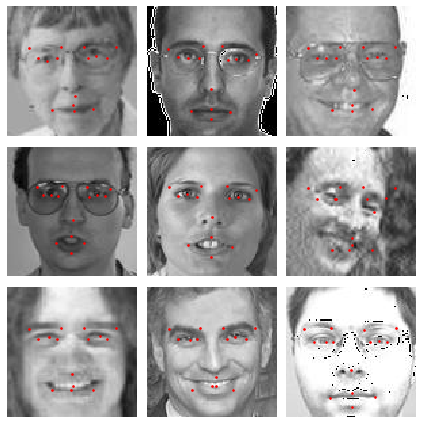

In [46]:
data.show_batch(3,figsize=(6,6))

# Training

In [47]:
# calculates distance between true and predictions
def mloss(y_true, y_pred):
    y_true=y_true.view(-1,15,2)
    
    y_true[:,:,0]=y_true[:,:,0].clone()-y_pred[:,:,0]
    y_true[:,:,1]=y_true[:,:,1].clone()-y_pred[:,:,1]
    
    y_true[:,:,0]=y_true[:,:,0].clone()**2
    y_true[:,:,1]=y_true[:,:,1].clone()**2
    
    return y_true.sum(dim=2).sum(dim=1).sum()

In [63]:
learn = cnn_learner(data,models.resnet34,loss_func=mloss,metrics=root_mean_squared_error)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 8.32E-03


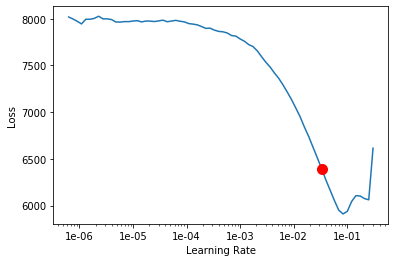

In [49]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [64]:
lr = 3.31e-2
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1375.640015,60.362564,0.394095,00:04
1,322.466034,146.868851,0.443546,00:04
2,62.039581,6.332089,0.386144,00:04
3,14.503053,6.425262,0.386257,00:04
4,8.326474,5.911698,0.386279,00:04
5,6.759871,5.453844,0.386360,00:04
6,6.027953,5.188037,0.386313,00:04
7,5.673877,5.109677,0.386338,00:04


In [66]:
learn.save('rn34-stage1')

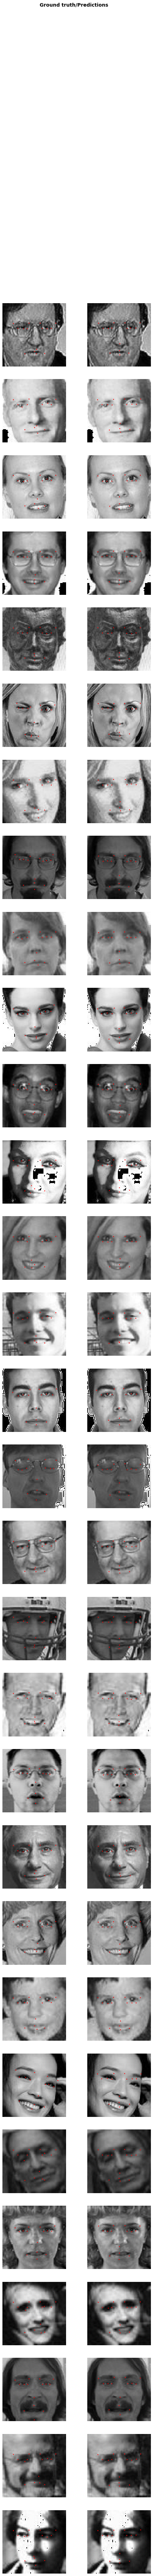

In [65]:
learn.show_results(ds_type=DatasetType.Valid, rows=30)